In [1]:
import pandas as pd
%matplotlib inline
df = pd.read_json('./AMDFullOptionChain.json')

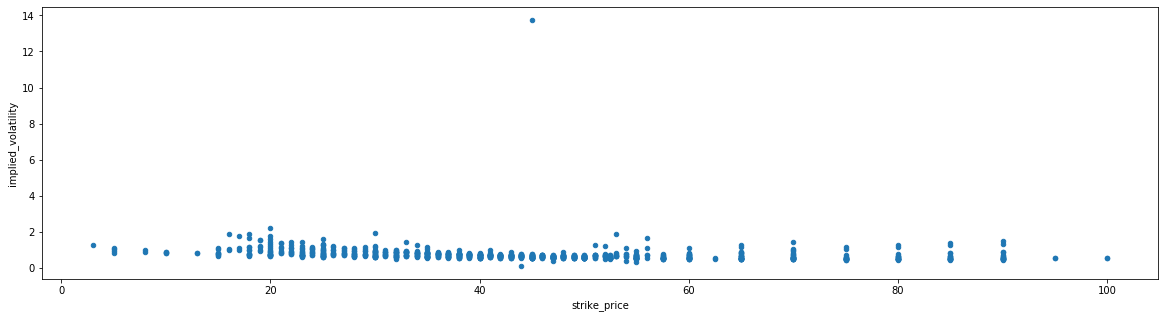

In [2]:
df.plot.scatter('strike_price', 'implied_volatility', figsize=(20,5))

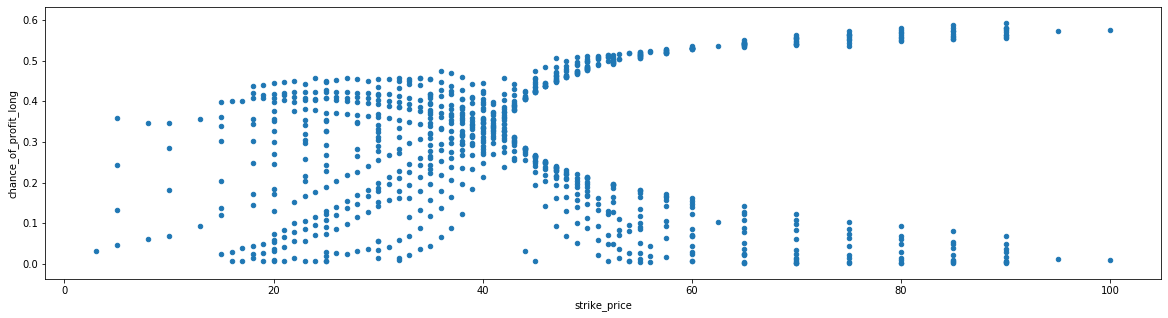

In [3]:
df.plot.scatter('strike_price', 'chance_of_profit_long', figsize=(20,5))

In [4]:
df['product'] = df.apply(lambda row: (row['chance_of_profit_short']/row['implied_volatility']), axis=1)

In [12]:
chance_profit = df['chance_of_profit_long'].describe()['75%']

In [21]:
chance_profit_low_iv = df[df['chance_of_profit_long'] > chance_profit]['implied_volatility'].describe()['25%']

In [22]:
max_profit = df[(df['chance_of_profit_long'] > chance_profit) & (df['implied_volatility'] < chance_profit_low_iv)]['adjusted_mark_price'].max()

In [23]:
df[(df['chance_of_profit_long'] > chance_profit) & (df['implied_volatility'] < chance_profit_low_iv) & (df['adjusted_mark_price'] == max_profit)]

,adjusted_mark_price,ask_price,ask_size,bid_price,bid_size,break_even_price,chance_of_profit_long,chance_of_profit_short,delta,expiration_date,...,previous_close_date,previous_close_price,rho,strike_price,theta,type,url,vega,volume,product
1302,49.33,51.05,725,47.6,928,40.67,0.593357,0.406643,-0.808744,2022-01-21,...,2020-04-02,47.53,-1.51033,90.0,-0.005192,put,https://api.robinhood.com/options/instruments/...,0.155811,0,0.869544


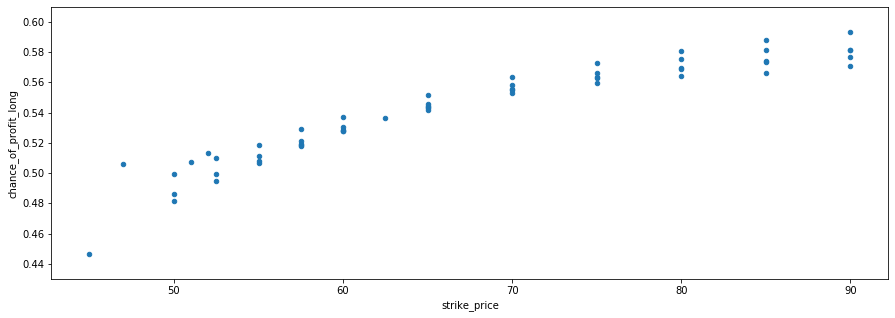

In [26]:
df[(df['chance_of_profit_long'] > chance_profit) & (df['implied_volatility'] < chance_profit_low_iv)].plot.scatter('strike_price', 'chance_of_profit_long', figsize=(15,5))

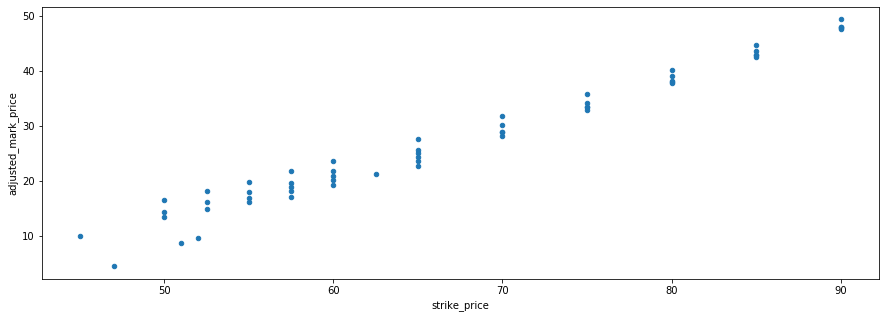

In [28]:
df[(df['chance_of_profit_long'] > chance_profit) & (df['implied_volatility'] < chance_profit_low_iv)].plot.scatter('strike_price', 'adjusted_mark_price', figsize=(15,5))

In [25]:
df.iloc[1302]

adjusted_mark_price                                                      49.33
ask_price                                                                51.05
ask_size                                                                   725
bid_price                                                                 47.6
bid_size                                                                   928
break_even_price                                                         40.67
chance_of_profit_long                                                 0.593357
chance_of_profit_short                                                0.406643
delta                                                                -0.808744
expiration_date                                                     2022-01-21
gamma                                                                 0.010188
high_fill_rate_buy_price                                                 50.54
high_fill_rate_sell_price                           